In [27]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring data

In [28]:
sns.set_style('whitegrid')

In [29]:
workbook = xlrd.open_workbook('.\members_dataset.xlsx')
sheet = workbook.sheet_by_index(0)

In [30]:
print('O número de linhas da planilha é:', sheet.nrows)
print('O número de colunas da planilha é:', sheet.ncols)

O número de linhas da planilha é: 557
O número de colunas da planilha é: 27


In [31]:
data = [[sheet.cell_value(r,c) for c in range (sheet.ncols)] for r in range (sheet.nrows)]

In [32]:
all_members = pd.DataFrame(data)
print(all_members.shape)
all_members.head()

(557, 27)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,Nome completo,Área,Cargo,Gmail,Celular 1,Telefone Fixo,CPF,RG,Orgão Exp.,Nascimento,...,Banco,Agência,Conta,Nome do Pai,Nome da Mãe,Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre
1,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,(21) 995856880,,166.430.077.55,2.84057e+08,SSP/RJ,36179,...,banco do Brasil,31186,408794,Ângelo José Gurgel Luz,Sylvia Gonzalez de Queiroz,17.2,1.71032e+07,Mecânica,17.1,18.1
2,Bernardo de Lara Conceição,Adm/fin,Diretor,bernardodelaraconceicao@gmail.com,(41) 99166-1122,,108.471.839-12,9.594.104-4,SSP/PR,35492,...,Itaú,4079,9967,Orlando Felipe da Conceição,Débora Maria de Lara Conceição,17.1,1.52007e+07,Mecânica,15.2,18.1
3,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,(48)998549575,,101.061.729-05,5.28583e+06,SSP/SC,35337,...,Banco do Brasil,321-2,111175-2,Marcos Luis Ramos Terra,Ana Maria Costa dos Reis,16.2,1.51008e+07,Elétrica,15.1,18.1
4,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,(48)99664-8491,(48) 3371-6718,098.552.109-05,5.022.262,SSP/SC,35555,...,Banco do Brasil,1410-9,28.424-6,José Leocádio Cabral Neto,Leila Maria Vasquez Beltrão,17.2,1.61047e+07,Civil,16.1,18.1


In [33]:
description = all_members.loc[0]
description

0              Nome completo
1                       Área
2                      Cargo
3                      Gmail
4                  Celular 1
5              Telefone Fixo
6                        CPF
7                         RG
8                 Orgão Exp.
9                 Nascimento
10        Data_de_nascimento
11                   Rua, nº
12                    Compl.
13    Bairro, Cidade, Estado
14                       CEP
15         Telefone dos pais
16         Endereço dos pais
17                     Banco
18                   Agência
19                     Conta
20               Nome do Pai
21               Nome da Mãe
22            Início na EJEP
23                 Matrícula
24             Engª Produção
25               Início UFSC
26                  Semestre
Name: 0, dtype: object

In [34]:
all_members = all_members.rename(index=str, columns=description)
all_members = all_members.drop(all_members.index[[0]])
all_members.head()

,Nome completo,Área,Cargo,Gmail,Celular 1,Telefone Fixo,CPF,RG,Orgão Exp.,Nascimento,...,Banco,Agência,Conta,Nome do Pai,Nome da Mãe,Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre
1,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,(21) 995856880,,166.430.077.55,2.84057e+08,SSP/RJ,36179,...,banco do Brasil,31186,408794,Ângelo José Gurgel Luz,Sylvia Gonzalez de Queiroz,17.2,1.71032e+07,Mecânica,17.1,18.1
2,Bernardo de Lara Conceição,Adm/fin,Diretor,bernardodelaraconceicao@gmail.com,(41) 99166-1122,,108.471.839-12,9.594.104-4,SSP/PR,35492,...,Itaú,4079,9967,Orlando Felipe da Conceição,Débora Maria de Lara Conceição,17.1,1.52007e+07,Mecânica,15.2,18.1
3,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,(48)998549575,,101.061.729-05,5.28583e+06,SSP/SC,35337,...,Banco do Brasil,321-2,111175-2,Marcos Luis Ramos Terra,Ana Maria Costa dos Reis,16.2,1.51008e+07,Elétrica,15.1,18.1
4,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,(48)99664-8491,(48) 3371-6718,098.552.109-05,5.022.262,SSP/SC,35555,...,Banco do Brasil,1410-9,28.424-6,José Leocádio Cabral Neto,Leila Maria Vasquez Beltrão,17.2,1.61047e+07,Civil,16.1,18.1
5,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,(48)991422177,,103.939.036-64,1.53538e+07,SSP/MG,35166,...,Banco do Brasil,1.24804e+06,21.967-3,Marcos Chiarelli,Tatiana Abreu Rogedo,17.1,1.61008e+07,Elétrica,16.1,18.1


In [35]:
all_members.columns

Index(['Nome completo', 'Área', 'Cargo', 'Gmail', 'Celular 1', 'Telefone Fixo',
       'CPF', 'RG', 'Orgão Exp.', 'Nascimento', 'Data_de_nascimento',
       'Rua, nº', 'Compl.', 'Bairro, Cidade, Estado', 'CEP',
       'Telefone dos pais', 'Endereço dos pais', ' Banco', 'Agência', 'Conta',
       'Nome do Pai', 'Nome da Mãe', 'Início na EJEP', 'Matrícula',
       'Engª Produção', 'Início UFSC', 'Semestre'],
      dtype='object')

In [36]:
del all_members['Celular 1'] 
del all_members['Telefone Fixo'] 
del all_members['CPF'] 
del all_members['RG'] 
del all_members['Rua, nº'] 
del all_members['Compl.'] 
del all_members['CEP'] 
del all_members['Telefone dos pais'] 
del all_members['Endereço dos pais'] 
del all_members[' Banco'] 
del all_members['Agência'] 
del all_members['Conta'] 
del all_members['Nome do Pai'] 
del all_members['Nome da Mãe']
del all_members['Nascimento']
all_members.drop(all_members.index[141], inplace=True)
all_members['key'] = np.arange(len(all_members))##

In [37]:
all_members.head(350)

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key
1,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0
2,Bernardo de Lara Conceição,Adm/fin,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1
3,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2
4,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3
5,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4
6,Guilherme Arrivabene,Adm/fin,Gerente,gui.arrivabene@gmail.com,SSP,22/01/98,"Santa Mônica, Florianópolis, SC",17.2,1.62026e+07,Mecânica,16.2,18.1,5
7,Guilherme Koerich da Silva,RH,Gerente,guilhermekoerich08@gmail.com,SSP/SC,11/02/93,"Centro, Florianópolis, Sc",17.2,1.52007e+07,Civil,15.2,18.1,6
8,Gustavo Melchiors,RH,Diretor,gustavoimelchiors@gmail.com,SSP/SC,20/11/97,"Coqueiros, Florianópolis, SC",16.1,1.61008e+07,Civil,16.1,18.1,7
9,João Vitor Maurício de Abreu,MKT,Gerente,joao.vmauricio@gmail.com,SSP/SC,26/10/98,"Centro, Florianópolis, SC",17.2,1.61033e+07,Civil,16.1,18.1,8
10,Lucas Franz,PJT,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,18.1,9


In [38]:
all_members.dtypes

Nome completo             object
Área                      object
Cargo                     object
Gmail                     object
Orgão Exp.                object
Data_de_nascimento        object
Bairro, Cidade, Estado    object
Início na EJEP            object
Matrícula                 object
Engª Produção             object
Início UFSC               object
Semestre                  object
key                        int32
dtype: object

In [39]:
all_members.count()

Nome completo             555
Área                      555
Cargo                     555
Gmail                     555
Orgão Exp.                555
Data_de_nascimento        555
Bairro, Cidade, Estado    555
Início na EJEP            555
Matrícula                 555
Engª Produção             555
Início UFSC               555
Semestre                  555
key                       555
dtype: int64

## Cleaning data

### Time now

In [40]:
all_members['Semestre'] = all_members['Semestre'].astype(str)

In [41]:
now = all_members['Semestre'].str.split('.', expand=True)
now = now.rename(index=str, columns={0: "Year_now", 1:"Semester_now"})
now['Year_now'] = "20" + now['Year_now']
now['key'] = np.arange(len(now))
now['Semester_now'] = now['Semester_now'].astype(int)

In [42]:
now['Semester_now'].value_counts()

1    293
2    262
Name: Semester_now, dtype: int64

In [43]:
now['month_now'] = np.where(now['Semester_now']>1, '7', '1')

In [44]:
now['month_now'].value_counts()

1    293
7    262
Name: month_now, dtype: int64

In [45]:
del now['Semester_now']

In [46]:
now['time_now'] = now['Year_now']+'-0'+now['month_now']

In [47]:
now.head()

,Year_now,key,month_now,time_now
1,2018,0,1,2018-01
2,2018,1,1,2018-01
3,2018,2,1,2018-01
4,2018,3,1,2018-01
5,2018,4,1,2018-01


In [48]:
all_members = all_members.merge(now, on='key', how='outer')

In [49]:
all_members.head()

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01
1,Bernardo de Lara Conceição,Adm/fin,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01


In [50]:
all_members['date_now'] = pd.to_datetime(all_members['time_now'], format='%Y-%m')

In [51]:
all_members.head()

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01,2018-01-01
1,Bernardo de Lara Conceição,Adm/fin,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01,2018-01-01
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01,2018-01-01
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01


In [53]:
all_members['date_now'].dtype

dtype('<M8[ns]')

In [54]:
treshhold = "2013-01"

In [55]:
import time
treshhold1 = pd.to_datetime(treshhold, format='%Y-%m')

In [56]:
treshhold1

Timestamp('2013-01-01 00:00:00')

In [57]:
all_members['yes_or_no'] = (all_members['date_now'] < treshhold1)*1

In [58]:
all_members[all_members['date_now'] < treshhold].head(500)

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no
363,Aldo Vieira Neto,PSD,Diretor,aldo.vieira.neto@gmail.com,SSP/SC,07/10/89,"Agronômica, Florianópolis, SC",2011.2,1.01009e+07,Mecânica,2010.1,12.2,363,2012,7,2012-07,2012-07-01,1
364,Ana Luiza Faraco de Oliveira,PSD,Diretor,faraco.analuiza@gmail.com,SSP/SC,27/09/87,"Itacorubi, Florianópolis, SC",2011.1,8.24202e+06,Civil,2008.2,12.2,364,2012,7,2012-07,2012-07-01,1
365,Ana Paula Stecanela Corrêa,CST,Gerente,anastecanela@gmail.com,SSP/SC,15/09/92,"Trindade, Florianópolis, SC",2012.1,1.12029e+07,Mecânica,2011.2,12.2,365,2012,7,2012-07,2012-07-01,1
366,Andre Vieira de Camargo Lopes,,trainee,andrevclopes9@gmail.com,SSP/SP,11/08/92,"Córrego Grande, Florianópolis, Brasil",12.2,1.11035e+07,Elétrica,11.1,12.2,366,2012,7,2012-07,2012-07-01,1
367,Cristiane Haupenthal,RH,Estagiária,cris.haupenthal@gmail.com,SSP/SC,22/06/89,"Estreito, Florianópolis, SC",2012.1,8.21701e+06,Psicologia,2008.2,12.2,367,2012,7,2012-07,2012-07-01,1
368,Debora Dal Farra,,trainee,debifarra@gmail.com,SSP/SC,09/05/94,"Trindade, Florianópolis, SC",12.2,1.21008e+07,Elétrica,12.1,12.2,368,2012,7,2012-07,2012-07-01,1
369,Eduardo Antônio Marçal,,trainee,eduardoxepa@gmail.com,ssp/go,30/03/93,"Carvoeira, Florianópolis, Brasil",12.2,1.21009e+07,Mecânica,12.1,12.2,369,2012,7,2012-07,2012-07-01,1
370,Eric Gustavo Poffo,PSD,Diretor,ericpoffo@gmail.com,SSP/SC,03/07/90,"Campeche, Florianopolis, /SC",2011.2,1.01009e+07,Mecânica,2010.1,12.2,370,2012,7,2012-07,2012-07-01,1
371,Guilherme Pegorer Frassan,,trainee,guilhermefrassan@gmail.com,SSP/SP,24/08/93,"Trindade, Florianópolis, SC",12.2,1.12029e+07,Elétrica,11.2,12.2,371,2012,7,2012-07,2012-07-01,1
372,Gustavo Ranzolin Piazzetta,,trainee,gustavopiazzetta@gmail.com,SSP/SC,07/06/93,"Córrego Grande, Florianópolis, Brasil",12.2,1.21008e+07,Civil,12.1,12.2,372,2012,7,2012-07,2012-07-01,1


In [59]:
all_members['yes_or_no'].value_counts()

0    363
1    192
Name: yes_or_no, dtype: int64

In [60]:
boolean = ['1']
all_members = all_members[~all_members['yes_or_no'].isin(boolean)]

In [61]:
all_members.dropna()

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01,2018-01-01,0
1,Bernardo de Lara Conceição,Adm/fin,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01,0
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01,2018-01-01,0
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01,2018-01-01,0
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01,0
5,Guilherme Arrivabene,Adm/fin,Gerente,gui.arrivabene@gmail.com,SSP,22/01/98,"Santa Mônica, Florianópolis, SC",17.2,1.62026e+07,Mecânica,16.2,18.1,5,2018,1,2018-01,2018-01-01,0
6,Guilherme Koerich da Silva,RH,Gerente,guilhermekoerich08@gmail.com,SSP/SC,11/02/93,"Centro, Florianópolis, Sc",17.2,1.52007e+07,Civil,15.2,18.1,6,2018,1,2018-01,2018-01-01,0
7,Gustavo Melchiors,RH,Diretor,gustavoimelchiors@gmail.com,SSP/SC,20/11/97,"Coqueiros, Florianópolis, SC",16.1,1.61008e+07,Civil,16.1,18.1,7,2018,1,2018-01,2018-01-01,0
8,João Vitor Maurício de Abreu,MKT,Gerente,joao.vmauricio@gmail.com,SSP/SC,26/10/98,"Centro, Florianópolis, SC",17.2,1.61033e+07,Civil,16.1,18.1,8,2018,1,2018-01,2018-01-01,0
9,Lucas Franz,PJT,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,18.1,9,2018,1,2018-01,2018-01-01,0


In [62]:
all_members.count()

Nome completo             363
Área                      363
Cargo                     363
Gmail                     363
Orgão Exp.                363
Data_de_nascimento        363
Bairro, Cidade, Estado    363
Início na EJEP            363
Matrícula                 363
Engª Produção             363
Início UFSC               363
Semestre                  363
key                       363
Year_now                  363
month_now                 363
time_now                  363
date_now                  363
yes_or_no                 363
dtype: int64

# Área

In [69]:
members_area = all_members['Área'].value_counts()  
members_area

TRN    128
PJT     78
MKT     56
RH      46
ADM     34
PSD     21
Name: Área, dtype: int64

In [70]:
all_members = all_members.replace(to_replace={'Adm/fin':'ADM'})
all_members = all_members.replace(to_replace={'Adm/Fin':'ADM'})
all_members = all_members.replace(to_replace={'ADMFIN':'ADM'})
all_members = all_members.replace(to_replace={'ADM FIN':'ADM'})
all_members = all_members.replace(to_replace={'PJTS':'PJT'})
all_members = all_members.replace(to_replace={'CST':'PJT'})
#dr

In [71]:
members_area = all_members['Área'].value_counts()  
members_area

TRN    128
PJT     78
MKT     56
RH      46
ADM     34
PSD     21
Name: Área, dtype: int64

In [72]:
all_members['Área'] = all_members['Área'].replace(to_replace={'':'TRN'})

In [73]:
all_members[all_members['Área'] == 'TRN']

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no
13,Patricia Budant Vanzella,TRN,Vice-Presidente,patriciabvanzella@gmail.com,SSP/SC,01/03/95,"Agronomica, Florianópolis, SC",17.1,1.52054e+07,Eletrica,15.2,18.1,13,2018,1,2018-01,2018-01-01,0
19,Thiago Faraco Nienkotter,TRN,Presidente,thiagonienkotter@gmail.com,SSP/SC,18/03/96,"Itaguaçú, Florianópolis, SC",16.1,1.51009e+07,Mecânica,15.1,18.1,19,2018,1,2018-01,2018-01-01,0
21,Henrique Voos Costenaro,TRN,Trainee,henriquevcostenaro@gmail.com,SSP/GO,18/02/98,"Trindade, Florianópolis",18.1,1.62064e+07,Civil,16.2,18.1,21,2018,1,2018-01,2018-01-01,0
22,Joana Echeverria Flores Somensi,TRN,Trainee,Joana.efsomensii@gmail.com,SSP/SC,28/08/97,"Carvoeira, Florianópolis",18.1,1.72005e+07,Mecânica,17.2,18.1,22,2018,1,2018-01,2018-01-01,0
23,Ricardo Pering dos Santos,TRN,Trainee,rica.pering@gmail.com,SSP/SC,13/05/97,"Estreito, Florianópolis, SC",18.1,1.61008e+07,Civil,16.1,18.1,23,2018,1,2018-01,2018-01-01,0
24,Leonardo Gasparini Duarte,TRN,Trainee,leogaspd@gmail.com,SSP/SP,07/02/96,"Pantanal, Florianopolis, SC",18.1,1.61058e+07,Elétrica,16.1,18.1,24,2018,1,2018-01,2018-01-01,0
25,Lucca Magri Zaghi,TRN,Trainee,luccamagrizaghi@gmail.com,SSP/SP,08/11/98,"Carvoeira, Florianópolis",18.1,1.71032e+07,Mecânica,17.1,18.1,25,2018,1,2018-01,2018-01-01,0
26,Bruna Stefanie Goulart,TRN,Trainee,bru.goult@gmail.com,SSP/SP,07/12/95,"Trindade, Florianópolis, SC",18.1,1.71051e+07,Civil,17.1,18.1,26,2018,1,2018-01,2018-01-01,0
27,Matheus Turri Benedetti,TRN,Trainee,matheusturri@gmail.com,SSP/SP,26/08/95,"Itacorubi, Florianópolis, SC",18.1,1.62007e+07,Civil,16.2,18.1,27,2018,1,2018-01,2018-01-01,0
28,Isadora Bez Batti Linhares da Silva,TRN,Trainee,isadorabezbatti607@gmail.com,SSP/PR,30/05/99,"Centro, Florianópolis, SC",18.1,1.71006e+07,Mecânica,17.1,18.1,28,2018,1,2018-01,2018-01-01,0


In [74]:
all_members.head(300)

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01,2018-01-01,0
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01,0
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01,2018-01-01,0
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01,2018-01-01,0
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01,0
5,Guilherme Arrivabene,ADM,Gerente,gui.arrivabene@gmail.com,SSP,22/01/98,"Santa Mônica, Florianópolis, SC",17.2,1.62026e+07,Mecânica,16.2,18.1,5,2018,1,2018-01,2018-01-01,0
6,Guilherme Koerich da Silva,RH,Gerente,guilhermekoerich08@gmail.com,SSP/SC,11/02/93,"Centro, Florianópolis, Sc",17.2,1.52007e+07,Civil,15.2,18.1,6,2018,1,2018-01,2018-01-01,0
7,Gustavo Melchiors,RH,Diretor,gustavoimelchiors@gmail.com,SSP/SC,20/11/97,"Coqueiros, Florianópolis, SC",16.1,1.61008e+07,Civil,16.1,18.1,7,2018,1,2018-01,2018-01-01,0
8,João Vitor Maurício de Abreu,MKT,Gerente,joao.vmauricio@gmail.com,SSP/SC,26/10/98,"Centro, Florianópolis, SC",17.2,1.61033e+07,Civil,16.1,18.1,8,2018,1,2018-01,2018-01-01,0
9,Lucas Franz,PJT,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,18.1,9,2018,1,2018-01,2018-01-01,0


In [75]:
mask1 = 'Presidente'
mask2 = 'TRN'
all_members.loc[all_members['Área'].str.contains(mask2, case=False), 'Área']
all_members.loc[all_members['Cargo'].str.contains(mask1, case=False), 'Área'] = 'PSD'

In [76]:
all_members.loc[all_members['Cargo'].str.contains(mask1, case=False), 'Área']

13     PSD
19     PSD
34     PSD
70     PSD
107    PSD
126    PSD
140    PSD
147    PSD
180    PSD
192    PSD
193    PSD
222    PSD
229    PSD
241    PSD
271    PSD
274    PSD
Name: Área, dtype: object

In [ ]:
# a partir daqui não rodar

In [77]:
mask11 = 'Gerente'
mask22 = 'TRN'
all_members['y'] = all_members.loc[all_members['Área'].str.contains(mask22, case=False), 'Área']
all_members['y'] = all_members.loc[all_members['Cargo'].str.contains(mask11, case=False), 'y'] 

In [78]:
all_members['y'].value_counts()

TRN    18
Name: y, dtype: int64

In [79]:
all_members[~all_members['y'].isnull()]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
37,Bernardo de Lara Conceição,TRN,Gerente,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,17.2,37,2017,7,2017-07,2017-07-01,0,TRN
43,Gabriel Rogedo Chiarelli,TRN,Gerente,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Trindade, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,17.2,43,2017,7,2017-07,2017-07-01,0,TRN
46,Marcela Aguiar,TRN,Gerente,marcelaldaguiar@gmail.com,SSP/MT,18/03/96,"Pantanal, Florianopolis, SC",17.1,1.52007e+07,Eletrica,15.2,17.2,46,2017,7,2017-07,2017-07-01,0,TRN
50,Lucas Franz,TRN,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,17.2,50,2017,7,2017-07,2017-07-01,0,TRN
53,Maria Laura Bion Nunes,TRN,Gerente,bionmaria2@gmail.com,SSP/SC,02/10/96,"Rio Vermelho, Florianópolis, SC",17.1,1.51042e+07,Civil,15.1,17.2,53,2017,7,2017-07,2017-07-01,0,TRN
55,Patricia Budant Vanzella,TRN,Gerente,patriciabvanzella@gmail.com,SSP/SC,01/03/95,"Agronomica, Florianópolis, SC",17.1,1.52054e+07,Eletrica,15.2,17.2,55,2017,7,2017-07,2017-07-01,0,TRN
59,Raphael Furtado,TRN,Gerente,raphaelfurtado.f@gmail.com,ssp/sp,09/09/95,"Pantanal, Florianopolis, SC",17.1,1.51042e+07,Mecânica,15.1,17.2,59,2017,7,2017-07,2017-07-01,0,TRN
127,Bianca Santos Vieira,TRN,Gerente,biancasantvie@gmail.com,SSP/SC,11/11/95,Pantanal,16.1,1.41041e+07,Civil,,16.1,127,2016,1,2016-01,2016-01-01,0,TRN
329,Amanda Cadori Maffioletti,TRN,Gerente adm fin,amandamaffioletti@gmail.com,SSP/SC,14/04/93,"Córrego Grande, Florianópolis, SC",2013.1,1.22048e+07,Mecânica,2012.2,13.1,329,2013,1,2013-01,2013-01-01,0,TRN
330,Ana Carla Reisdorfer,TRN,Gerente cst,ana.reisdorfer@gmail.com,SSP/SC,04/08/94,"Trindade, Florianópolis, SC",2013.1,1.21008e+07,Civil,2012.1,13.1,330,2013,1,2013-01,2013-01-01,0,TRN


In [80]:
all_members[all_members['Nome completo'] == 'Bernardo de Lara Conceição']

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01,0,NaN
37,Bernardo de Lara Conceição,TRN,Gerente,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,17.2,37,2017,7,2017-07,2017-07-01,0,TRN
66,Bernardo de Lara Conceição,TRN,Trainee,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,17.1,66,2017,1,2017-01,2017-01-01,0,NaN


In [81]:
um = all_members['Área'][all_members['Nome completo'] == 'Bernardo de Lara Conceição'][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'ADM'})

In [82]:
all_members[all_members['Nome completo'].str.contains('Rogedo')]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01,0,NaN
43,Gabriel Rogedo Chiarelli,TRN,Gerente,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Trindade, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,17.2,43,2017,7,2017-07,2017-07-01,0,TRN
75,Gabriel Rogedo Chiarelli,TRN,Trainee,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Trindade, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,17.1,75,2017,1,2017-01,2017-01-01,0,NaN


In [83]:
dois = all_members['Área'][all_members['Nome completo'].str.contains('Rogedo')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'MKT'})

In [84]:
all_members[all_members['Nome completo'].str.contains('Marcela Aguiar')]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
46,Marcela Aguiar,TRN,Gerente,marcelaldaguiar@gmail.com,SSP/MT,18/03/96,"Pantanal, Florianopolis, SC",17.1,1.52007e+07,Eletrica,15.2,17.2,46,2017,7,2017-07,2017-07-01,0,TRN
84,Marcela Aguiar,TRN,Trainee,marcelaldaguiar@gmail.com,SSP/MT,18/03/96,"Pantanal, Florianopolis, SC",17.1,1.52007e+07,Eletrica,15.2,17.1,84,2017,1,2017-01,2017-01-01,0,NaN


In [85]:
tres = all_members['Área'][all_members['Nome completo'].str.contains('Marcela Aguiar')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'MKT'})

In [86]:
all_members[all_members['Nome completo'].str.contains('Lucas Franz')]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
9,Lucas Franz,PJT,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,18.1,9,2018,1,2018-01,2018-01-01,0,NaN
50,Lucas Franz,TRN,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,17.2,50,2017,7,2017-07,2017-07-01,0,TRN
82,Lucas Franz,TRN,Trainee,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,17.1,82,2017,1,2017-01,2017-01-01,0,NaN


In [87]:
quatro = all_members['Área'][all_members['Nome completo'].str.contains('Lucas Franz')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'PJT'})

In [88]:
all_members[all_members['Nome completo'].str.contains('Maria Laura Bion Nunes')]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
12,Maria Laura Bion Nunes,PJT,Gerente,bionmaria2@gmail.com,SSP/SC,02/10/96,"Rio Vermelho, Florianópolis, SC",17.1,1.51042e+07,Civil,15.1,18.1,12,2018,1,2018-01,2018-01-01,0,NaN
53,Maria Laura Bion Nunes,TRN,Gerente,bionmaria2@gmail.com,SSP/SC,02/10/96,"Rio Vermelho, Florianópolis, SC",17.1,1.51042e+07,Civil,15.1,17.2,53,2017,7,2017-07,2017-07-01,0,TRN
85,Maria Laura Bion Nunes,TRN,Trainee,bionmaria2@gmail.com,SSP/SC,02/10/96,"Rio Vermelho, Florianópolis, SC",17.1,1.51042e+07,Civil,15.1,17.1,85,2017,1,2017-01,2017-01-01,0,NaN


In [89]:
cinco = all_members['Área'][all_members['Nome completo'].str.contains('Maria Laura Bion Nunes')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'PJT'})

In [90]:
all_members[all_members['Nome completo'].str.contains('Patricia Budant Vanzella')]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
13,Patricia Budant Vanzella,PSD,Vice-Presidente,patriciabvanzella@gmail.com,SSP/SC,01/03/95,"Agronomica, Florianópolis, SC",17.1,1.52054e+07,Eletrica,15.2,18.1,13,2018,1,2018-01,2018-01-01,0,NaN
55,Patricia Budant Vanzella,TRN,Gerente,patriciabvanzella@gmail.com,SSP/SC,01/03/95,"Agronomica, Florianópolis, SC",17.1,1.52054e+07,Eletrica,15.2,17.2,55,2017,7,2017-07,2017-07-01,0,TRN
86,Patricia Budant Vanzella,TRN,Trainee,patriciabvanzella@gmail.com,SSP/SC,01/03/95,"Agronomica, Florianópolis, SC",17.1,1.52054e+07,Eletrica,15.2,17.1,86,2017,1,2017-01,2017-01-01,0,NaN


In [91]:
seis = all_members['Área'][all_members['Nome completo'].str.contains('Patricia Budant Vanzella')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'PJT'})

In [92]:
all_members[all_members['Nome completo'].str.contains('Raphael Furtado')]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
17,Raphael Furtado,MKT,Gerente,raphaelfurtado.f@gmail.com,ssp/sp,09/09/95,"Pantanal, Florianopolis, SC",17.1,1.51042e+07,Mecânica,15.1,18.1,17,2018,1,2018-01,2018-01-01,0,NaN
59,Raphael Furtado,TRN,Gerente,raphaelfurtado.f@gmail.com,ssp/sp,09/09/95,"Pantanal, Florianopolis, SC",17.1,1.51042e+07,Mecânica,15.1,17.2,59,2017,7,2017-07,2017-07-01,0,TRN
87,Raphael Furtado,TRN,Trainee,raphaelfurtado.f@gmail.com,ssp/sp,09/09/95,"Pantanal, Florianopolis, SC",17.1,1.51042e+07,Mecânica,15.1,17.1,87,2017,1,2017-01,2017-01-01,0,NaN


In [93]:
sete = all_members['Área'][all_members['Nome completo'].str.contains('Raphael Furtado')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'MKT'})

In [94]:
all_members[all_members['Nome completo'].str.contains('Bianca Santos Vieira')]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
67,Bianca Santos Vieira,MKT,Gerente,biancasantvie@gmail.com,SSP/SC,11/11/95,Pantanal,16.1,1.41041e+07,Civil,,17.1,67,2017,1,2017-01,2017-01-01,0,NaN
95,Bianca Santos Vieira,RH,Gerente,biancasantvie@gmail.com,SSP/SC,11/11/95,Pantanal,16.1,1.41041e+07,Civil,,16.2,95,2016,7,2016-07,2016-07-01,0,NaN
127,Bianca Santos Vieira,TRN,Gerente,biancasantvie@gmail.com,SSP/SC,11/11/95,Pantanal,16.1,1.41041e+07,Civil,,16.1,127,2016,1,2016-01,2016-01-01,0,TRN


In [95]:
oito = all_members['Área'][all_members['Nome completo'].str.contains('Bianca Santos Vieira')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'MKT'})

In [96]:
nove = all_members['Área'][all_members['Nome completo'].str.contains('Amanda Cadori Maffioletti')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'ADM'})

In [97]:
dez = all_members['Área'][all_members['Nome completo'].str.contains('Ana Carla Reisdorfer')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'PJT'})

In [98]:
onze = all_members['Área'][all_members['Nome completo'].str.contains('Ana Paula Trevizan')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'PJT'})

In [99]:
doze = all_members['Área'][all_members['Nome completo'].str.contains('Daniel Andrucioli')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'MKT'})

In [100]:
treze = all_members['Área'][all_members['Nome completo'].str.contains('Gustavo Müller Oliveira')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'ADM'})

In [101]:
catorze = all_members['Área'][all_members['Nome completo'].str.contains('Isabelly Mazuco da Silva')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'RH'})

In [102]:
quinze = all_members['Área'][all_members['Nome completo'].str.contains('João Paulo Padovani Guerra')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'PJT'})

In [103]:
dezesseis = all_members['Área'][all_members['Nome completo'].str.contains('Renan Giassi Zanette')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'MKT'})

In [104]:
dezessete = all_members['Área'][all_members['Nome completo'].str.contains('Tiago Manke')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'MKT'})

In [105]:
dezoito = all_members['Área'][all_members['Nome completo'].str.contains('Willi Gerber')][all_members['Cargo'] == 'Gerente'].replace(to_replace={'TRN':'RH'})

In [106]:
um = pd.DataFrame(um)
dois = pd.DataFrame(dois)
tres = pd.DataFrame(tres)
quatro = pd.DataFrame(quatro)
cinco = pd.DataFrame(cinco)
seis = pd.DataFrame(seis)
sete = pd.DataFrame(sete)
oito = pd.DataFrame(oito)
nove = pd.DataFrame(nove)
dez = pd.DataFrame(dez)
onze = pd.DataFrame(onze)
doze = pd.DataFrame(doze)
treze = pd.DataFrame(treze)
catorze = pd.DataFrame(catorze)
quinze = pd.DataFrame(quinze)
dezesseis = pd.DataFrame(dezesseis)
dezessete = pd.DataFrame(dezessete)
dezoito = pd.DataFrame(dezoito)

In [107]:
dezoito

,Área
326,RH


In [108]:
#Falar com Gabi

In [109]:
all_members.head()

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,y
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01,2018-01-01,0,NaN
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01,0,NaN
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01,2018-01-01,0,NaN
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01,2018-01-01,0,NaN
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01,0,NaN


In [110]:
# juntar colunas e merge com a Área

In [76]:
#all_members[~all_members['ColumnA'].isnull()].head()

In [120]:
all_members.count()

Nome completo             360
Área                      360
Cargo                     360
Gmail                     360
Orgão Exp.                360
Data_de_nascimento        360
Bairro, Cidade, Estado    360
Início na EJEP            360
Matrícula                 360
Engª Produção             360
Início UFSC               360
Semestre                  360
key                       360
Year_now                  360
month_now                 360
time_now                  360
date_now                  360
yes_or_no                 360
dtype: int64

### Cargo

In [121]:
members_cargo = all_members['Cargo'].value_counts()  
members_cargo

Gerente            180
Trainee            113
Diretor             50
Presidente           9
Vice-Presidente      8
Name: Cargo, dtype: int64

In [122]:
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'trainee' :'Trainee'})
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Diretora':'Diretor'})
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Gerente mkt':'Gerente'})
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Gerente cst':'Gerente'})
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Vice':'Vice-Presidente'})
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Gerente adm fin':'Gerente'})       
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Gerente rh':'Gerente'})
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Trainee ':'Trainee'})
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Estagiária ':'Trainee'})
all_members['Cargo'] = all_members['Cargo'].replace(to_replace={'Presidente ':'Trainee'})

In [123]:
all_members['Cargo'].value_counts()  

Gerente            180
Trainee            113
Diretor             50
Presidente           9
Vice-Presidente      8
Name: Cargo, dtype: int64

In [124]:
a = ['Estagiária']
all_members = all_members[~all_members['Cargo'].isin(a)]
all_members['Cargo'].value_counts()

Gerente            180
Trainee            113
Diretor             50
Presidente           9
Vice-Presidente      8
Name: Cargo, dtype: int64

In [125]:
all_members.dropna()

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01,2018-01-01,0
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01,0
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01,2018-01-01,0
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01,2018-01-01,0
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01,0
5,Guilherme Arrivabene,ADM,Gerente,gui.arrivabene@gmail.com,SSP,22/01/98,"Santa Mônica, Florianópolis, SC",17.2,1.62026e+07,Mecânica,16.2,18.1,5,2018,1,2018-01,2018-01-01,0
6,Guilherme Koerich da Silva,RH,Gerente,guilhermekoerich08@gmail.com,SSP/SC,11/02/93,"Centro, Florianópolis, Sc",17.2,1.52007e+07,Civil,15.2,18.1,6,2018,1,2018-01,2018-01-01,0
7,Gustavo Melchiors,RH,Diretor,gustavoimelchiors@gmail.com,SSP/SC,20/11/97,"Coqueiros, Florianópolis, SC",16.1,1.61008e+07,Civil,16.1,18.1,7,2018,1,2018-01,2018-01-01,0
8,João Vitor Maurício de Abreu,MKT,Gerente,joao.vmauricio@gmail.com,SSP/SC,26/10/98,"Centro, Florianópolis, SC",17.2,1.61033e+07,Civil,16.1,18.1,8,2018,1,2018-01,2018-01-01,0
9,Lucas Franz,PJT,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,18.1,9,2018,1,2018-01,2018-01-01,0


In [126]:
all_members.count()

Nome completo             360
Área                      360
Cargo                     360
Gmail                     360
Orgão Exp.                360
Data_de_nascimento        360
Bairro, Cidade, Estado    360
Início na EJEP            360
Matrícula                 360
Engª Produção             360
Início UFSC               360
Semestre                  360
key                       360
Year_now                  360
month_now                 360
time_now                  360
date_now                  360
yes_or_no                 360
dtype: int64

### Gmail

In [127]:
all_members['Gmail'].isnull().any()

False

### Orgão exp - estado de origem da pessoa

In [128]:
all_members['Orgão Exp.'].isnull().any()

False

In [129]:
estado = all_members['Orgão Exp.'].str.split('/', expand=True)
estado.head()

,0,1
0,SSP,RJ
1,SSP,PR
2,SSP,SC
3,SSP,SC
4,SSP,MG


In [130]:
estado['key'] = all_members['key']
del estado[0]
estado.head()

,1,key
0,RJ,0
1,PR,1
2,SC,2
3,SC,3
4,MG,4


In [131]:
estado = estado.rename(index=str, columns={1: "Estado_de_origem"})
estado.head()

,Estado_de_origem,key
0,RJ,0
1,PR,1
2,SC,2
3,SC,3
4,MG,4


In [132]:
estado['Estado_de_origem'].value_counts()

SC    180
SP     76
PR     21
MS     12
BA     12
RS      9
sp      6
DF      5
RO      5
GO      4
MT      4
MG      3
RJ      2
go      2
SE      1
PB      1
Name: Estado_de_origem, dtype: int64

In [133]:
estado['Estado_de_origem'] = estado['Estado_de_origem'].replace(to_replace={'sc':'SC'})
estado['Estado_de_origem'] = estado['Estado_de_origem'].replace(to_replace={'sp':'SP'})
estado['Estado_de_origem'] = estado['Estado_de_origem'].replace(to_replace={'go':'GO'})

In [134]:
estado['Estado_de_origem'].value_counts()

SC    180
SP     82
PR     21
MS     12
BA     12
RS      9
GO      6
DF      5
RO      5
MT      4
MG      3
RJ      2
SE      1
PB      1
Name: Estado_de_origem, dtype: int64

In [135]:
all_members = all_members.merge(estado, on='key', how='outer')


In [136]:
all_members.head(500)

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,Estado_de_origem
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01,2018-01-01,0,RJ
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01,0,PR
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01,2018-01-01,0,SC
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01,2018-01-01,0,SC
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01,0,MG
5,Guilherme Arrivabene,ADM,Gerente,gui.arrivabene@gmail.com,SSP,22/01/98,"Santa Mônica, Florianópolis, SC",17.2,1.62026e+07,Mecânica,16.2,18.1,5,2018,1,2018-01,2018-01-01,0,None
6,Guilherme Koerich da Silva,RH,Gerente,guilhermekoerich08@gmail.com,SSP/SC,11/02/93,"Centro, Florianópolis, Sc",17.2,1.52007e+07,Civil,15.2,18.1,6,2018,1,2018-01,2018-01-01,0,SC
7,Gustavo Melchiors,RH,Diretor,gustavoimelchiors@gmail.com,SSP/SC,20/11/97,"Coqueiros, Florianópolis, SC",16.1,1.61008e+07,Civil,16.1,18.1,7,2018,1,2018-01,2018-01-01,0,SC
8,João Vitor Maurício de Abreu,MKT,Gerente,joao.vmauricio@gmail.com,SSP/SC,26/10/98,"Centro, Florianópolis, SC",17.2,1.61033e+07,Civil,16.1,18.1,8,2018,1,2018-01,2018-01-01,0,SC
9,Lucas Franz,PJT,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",17.1,1.51042e+07,Mecânica,15.1,18.1,9,2018,1,2018-01,2018-01-01,0,SC


In [137]:
def get_rid_of_nulls(value):
    if pd.isnull(value):
        return 'No_fill'
    else:
        return value

all_members['Estado_de_origem'] = all_members['Estado_de_origem'].apply(get_rid_of_nulls)

In [138]:
all_members[all_members['Estado_de_origem'].str.contains("No_fill", na=True)]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,Estado_de_origem
5,Guilherme Arrivabene,ADM,Gerente,gui.arrivabene@gmail.com,SSP,22/01/98,"Santa Mônica, Florianópolis, SC",17.2,1.62026e+07,Mecânica,16.2,18.1,5,2018,1,2018-01,2018-01-01,0,No_fill
44,Guilherme Arrivabene,TRN,Trainee,gui.arrivabene@gmail.com,,22/01/98,,17.2,1.62026e+07,Mecânica,16.2,17.2,44,2017,7,2017-07,2017-07-01,0,No_fill
97,Daniel Silva Paredes,MKT,Gerente,danparedes30@gmail.com,,30/05/95,"Carianos, Florianópolis, SC",2015.2,1.42097e+07,Civil,2014.1,16.2,97,2016,7,2016-07,2016-07-01,0,No_fill
129,Daniel Silva Paredes,RH,Gerente,danparedes30@gmail.com,,30/05/95,"Carianos, Florianópolis, SC",2015.2,1.42097e+07,Civil,2014.1,16.1,129,2016,1,2016-01,2016-01-01,0,No_fill
132,Delrobson Valente Nava de Souza,ADM,Gerente,delrobson@gmail.com,pm,03/03/90,Trindade,2015.1,1.31009e+07,Mecânica,2013.1,16.1,132,2016,1,2016-01,2016-01-01,0,No_fill
163,Daniel Silva Paredes,TRN,Trainee,danparedes30@gmail.com,,30/05/95,"Carianos, Florianópolis, SC",2015.2,1.42097e+07,Civil,2014.1,15.2,163,2015,7,2015-07,2015-07-01,0,No_fill
166,Delrobson V. Nava de Souza,MKT,Gerente,delrobson@gmail.com,pm,03/03/90,Trindade,2015.1,1.31009e+07,Mecânica,2013.1,15.2,166,2015,7,2015-07,2015-07-01,0,No_fill
169,Felipe Vieria Leandro,ADM,Gerente,felipevleandro@gmail.com,sp,15/02/94,Trindade,2015.1,1.41041e+07,Mecânica,2014.1,15.2,169,2015,7,2015-07,2015-07-01,0,No_fill
179,Kim Alessander Nowikow,RH,Gerente,kim.alessander@gmail.com,sp,15/10/93,Trindade,2015.1,1.31008e+07,Civil,2013.1,15.2,179,2015,7,2015-07,2015-07-01,0,No_fill
200,Delrobson V. Nava de Souza,TRN,Trainee,delrobson@gmail.com,pm,03/03/90,Trindade,2015.1,1.31009e+07,Mecânica,2013.1,15.1,200,2015,1,2015-01,2015-01-01,0,No_fill


In [139]:
def Estado_PA():
    for i in all_members:
        i = [97,129,163,132,166,200]
        return all_members.iloc[i,13].replace(to_replace={'PA':'y'})

In [140]:
Estado_PA()

97     2016
129    2016
163    2015
132    2016
166    2015
200    2015
Name: Year_now, dtype: object

### Bairro, cidade, estado - localidade atual da pessoa

In [141]:
local = all_members['Bairro, Cidade, Estado'].str.split(',', expand=True)
local.head()

,0,1,2
0,Trindade,Florianópolis,SC
1,Lagoa da Conceição,Florianópolis,SC
2,Trindade,Florianópolis,SC
3,Itacorubi,Florianópolis,SC
4,Centro,Florianópolis,SC


In [142]:
local.isnull().any()

0    False
1     True
2     True
dtype: bool

In [143]:
del local[1]
del local[2]

In [144]:
local = local.rename(index=str, columns={0: "Localizacao"})

In [145]:
local['key'] = np.arange(len(local))

In [146]:
local.head()

,Localizacao,key
0,Trindade,0
1,Lagoa da Conceição,1
2,Trindade,2
3,Itacorubi,3
4,Centro,4


In [147]:
all_members = all_members.merge(local, on='key', how='outer')

In [148]:
all_members.head()

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,Estado_de_origem,Localizacao
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",17.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01,2018-01-01,0.0,RJ,Trindade
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",17.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01,0.0,PR,Lagoa da Conceição
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",16.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01,2018-01-01,0.0,SC,Trindade
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",17.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01,2018-01-01,0.0,SC,Itacorubi
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",17.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01,0.0,MG,Centro


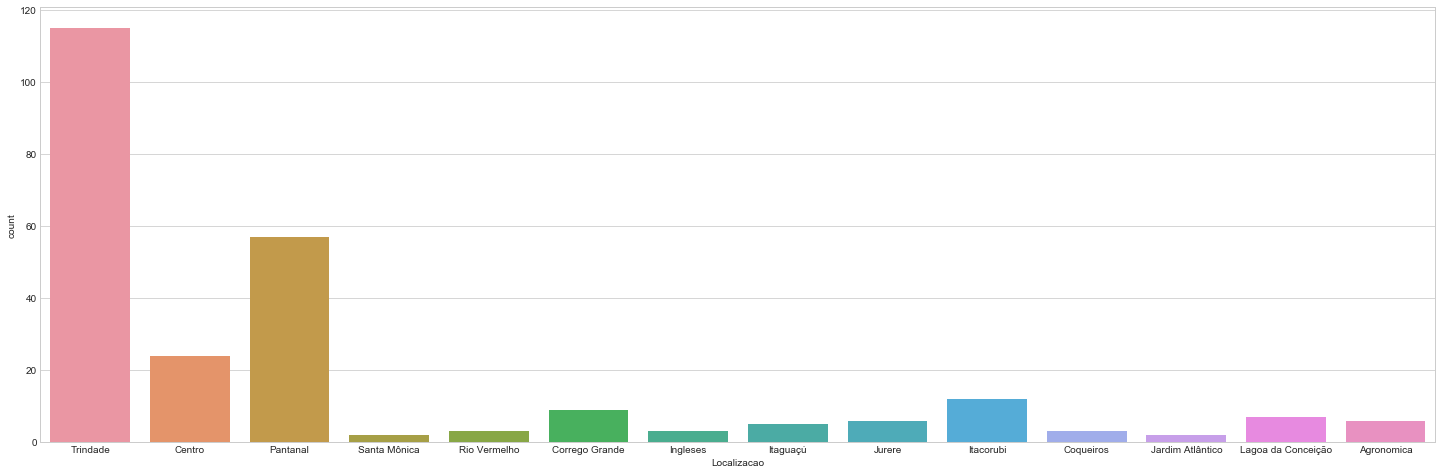

In [149]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(25.0, 8.0)
sns.countplot(x='Localizacao', data=local, ax=ax, order= all_members['Localizacao'][:20].value_counts().index)

In [151]:
all_members.count()

Nome completo             360
Área                      360
Cargo                     360
Gmail                     360
Orgão Exp.                360
Data_de_nascimento        360
Bairro, Cidade, Estado    360
Início na EJEP            360
Matrícula                 360
Engª Produção             360
Início UFSC               360
Semestre                  360
key                       363
Year_now                  360
month_now                 360
time_now                  360
date_now                  360
yes_or_no                 360
Estado_de_origem          360
Localizacao               360
dtype: int64

### eng de producao

In [152]:
all_members['Engª Produção'].value_counts()

Mecânica      144
Civil         135
Elétrica       47
Mecânica       13
Eletrica        6
Eletrica        5
Psicologia      4
Elétrica        3
mecanica        3
Name: Engª Produção, dtype: int64

In [153]:
all_members['Engª Produção'] = all_members['Engª Produção'].replace(to_replace={'Eletrica' :'Elétrica'})
all_members['Engª Produção'] = all_members['Engª Produção'].replace(to_replace={'Eletrica ' :'Elétrica'})
all_members['Engª Produção'] = all_members['Engª Produção'].replace(to_replace={'Elétrica ' :'Elétrica'})
all_members['Engª Produção'] = all_members['Engª Produção'].replace(to_replace={'civil' :'Civil'})
all_members['Engª Produção'] = all_members['Engª Produção'].replace(to_replace={'mecanica' :'Mecânica'})
all_members['Engª Produção'] = all_members['Engª Produção'].replace(to_replace={'Mecânica ' :'Mecânica'})

In [154]:
all_members['Engª Produção'].value_counts()

Mecânica      160
Civil         135
Elétrica       61
Psicologia      4
Name: Engª Produção, dtype: int64

### Início na EJEP e Nascimento

In [155]:
all_members['Início na EJEP'].isnull().any()

True

In [156]:
all_members['Início na EJEP'].value_counts()

2014.2    36
2013.1    36
16.1      35
2015.1    35
2015.2    30
17.1      28
2014.1    28
2013.2    28
2012.2    26
17.2      21
16.2      20
18.1      12
2012.1    12
15.2       8
2011.2     3
18.1       1
2016       1
Name: Início na EJEP, dtype: int64

In [157]:
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'2016/01/01':'2016.1'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'18.1 ':'2018.1'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'16.1':'2016.1'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'17.1':'2017.1'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'17.2':'2017.2'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'16.2':'2016.2'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'12.2':'2012.2'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'18.1':'2018.1'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'15.2':'2015.2'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'11.2':'2011.2'})
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'2016':'2016.1'})

In [158]:
all_members['Início na EJEP'] = all_members['Início na EJEP'].replace(to_replace={'18.1':'2018.1'})

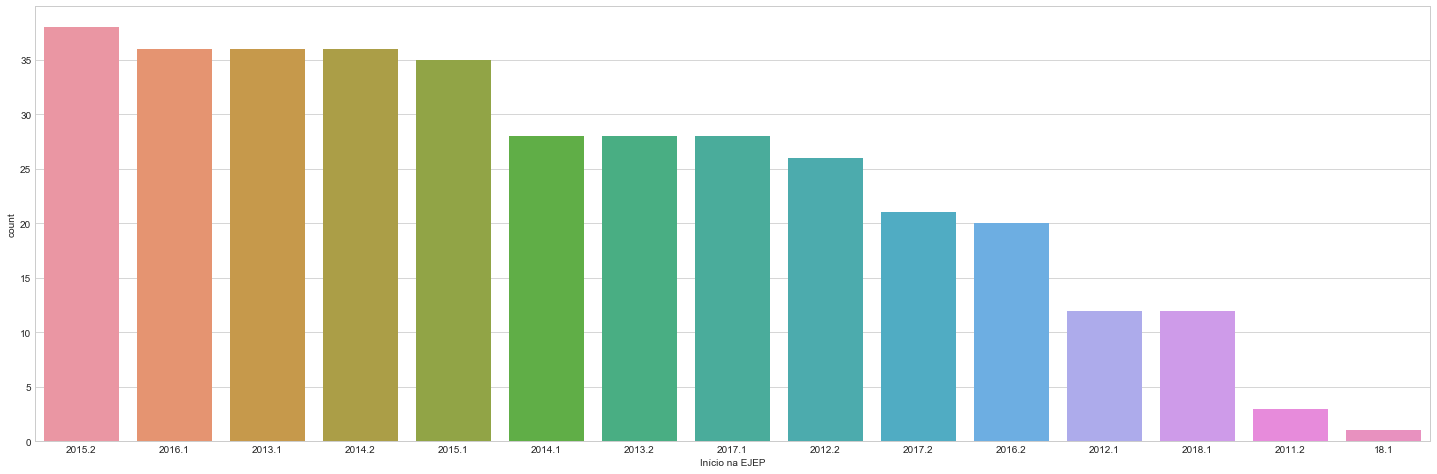

In [159]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(25.0, 8.0)
sns.countplot(x='Início na EJEP', data=all_members, ax=ax, order=all_members['Início na EJEP'].value_counts().index)

In [160]:
all_members.count()

Nome completo             360
Área                      360
Cargo                     360
Gmail                     360
Orgão Exp.                360
Data_de_nascimento        360
Bairro, Cidade, Estado    360
Início na EJEP            360
Matrícula                 360
Engª Produção             360
Início UFSC               360
Semestre                  360
key                       363
Year_now                  360
month_now                 360
time_now                  360
date_now                  360
yes_or_no                 360
Estado_de_origem          360
Localizacao               360
dtype: int64

### Matricula e início na ejep

In [161]:
all_members.head(500)

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,Início UFSC,Semestre,key,Year_now,month_now,time_now,date_now,yes_or_no,Estado_de_origem,Localizacao
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",2017.2,1.71032e+07,Mecânica,17.1,18.1,0,2018,1,2018-01,2018-01-01,0.0,RJ,Trindade
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",2017.1,1.52007e+07,Mecânica,15.2,18.1,1,2018,1,2018-01,2018-01-01,0.0,PR,Lagoa da Conceição
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",2016.2,1.51008e+07,Elétrica,15.1,18.1,2,2018,1,2018-01,2018-01-01,0.0,SC,Trindade
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",2017.2,1.61047e+07,Civil,16.1,18.1,3,2018,1,2018-01,2018-01-01,0.0,SC,Itacorubi
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",2017.1,1.61008e+07,Elétrica,16.1,18.1,4,2018,1,2018-01,2018-01-01,0.0,MG,Centro
5,Guilherme Arrivabene,ADM,Gerente,gui.arrivabene@gmail.com,SSP,22/01/98,"Santa Mônica, Florianópolis, SC",2017.2,1.62026e+07,Mecânica,16.2,18.1,5,2018,1,2018-01,2018-01-01,0.0,No_fill,Santa Mônica
6,Guilherme Koerich da Silva,RH,Gerente,guilhermekoerich08@gmail.com,SSP/SC,11/02/93,"Centro, Florianópolis, Sc",2017.2,1.52007e+07,Civil,15.2,18.1,6,2018,1,2018-01,2018-01-01,0.0,SC,Centro
7,Gustavo Melchiors,RH,Diretor,gustavoimelchiors@gmail.com,SSP/SC,20/11/97,"Coqueiros, Florianópolis, SC",2016.1,1.61008e+07,Civil,16.1,18.1,7,2018,1,2018-01,2018-01-01,0.0,SC,Coqueiros
8,João Vitor Maurício de Abreu,MKT,Gerente,joao.vmauricio@gmail.com,SSP/SC,26/10/98,"Centro, Florianópolis, SC",2017.2,1.61033e+07,Civil,16.1,18.1,8,2018,1,2018-01,2018-01-01,0.0,SC,Centro
9,Lucas Franz,PJT,Gerente,lucas.franz.m@gmail.com,SSP/SC,31/08/95,"Ingleses, Florianópolis, SC",2017.1,1.51042e+07,Mecânica,15.1,18.1,9,2018,1,2018-01,2018-01-01,0.0,SC,Ingleses


In [162]:
all_members['Matrícula'].isnull().any()

True

In [163]:
all_members['Matrícula'] = all_members['Matrícula'].astype(str)

In [164]:
lenght = all_members['Matrícula'].str.len()
lenght.value_counts()

10    358
3       3
8       2
Name: Matrícula, dtype: int64

In [165]:
all_members['Ano_UFSC'] = "20" + all_members['Matrícula'].astype(str).str[:2]

In [166]:
all_members['Semestre_UFSC'] = all_members['Matrícula'].astype(str).str[2:3]

In [167]:
all_members['Ano_UFSC'].value_counts()

2013    76
2015    75
2014    71
2012    58
2016    34
2011    33
2017    10
2010     3
20na     3
Name: Ano_UFSC, dtype: int64

In [168]:
all_members['Ano_EJEP'] = all_members['Início na EJEP'].astype(str).str[:4]

In [169]:
all_members['Semestre_EJEP'] = all_members['Início na EJEP'].astype(str).str[5]

In [170]:
all_members = all_members.dropna()

In [171]:
all_members.count()

Nome completo             356
Área                      356
Cargo                     356
Gmail                     356
Orgão Exp.                356
Data_de_nascimento        356
Bairro, Cidade, Estado    356
Início na EJEP            356
Matrícula                 356
Engª Produção             356
Início UFSC               356
Semestre                  356
key                       356
Year_now                  356
month_now                 356
time_now                  356
date_now                  356
yes_or_no                 356
Estado_de_origem          356
Localizacao               356
Ano_UFSC                  356
Semestre_UFSC             356
Ano_EJEP                  356
Semestre_EJEP             356
dtype: int64

# Transformando pra datetime

In [172]:
all_members.head()

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,...,month_now,time_now,date_now,yes_or_no,Estado_de_origem,Localizacao,Ano_UFSC,Semestre_UFSC,Ano_EJEP,Semestre_EJEP
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,19/01/99,"Trindade, Florianópolis, SC",2017.2,17103178.0,Mecânica,...,1,2018-01,2018-01-01,0.0,RJ,Trindade,2017,1,2017,2
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,03/03/97,"Lagoa da Conceição, Florianópolis, SC",2017.1,15200711.0,Mecânica,...,1,2018-01,2018-01-01,0.0,PR,Lagoa da Conceição,2015,2,2017,1
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,29/09/96,"Trindade, Florianópolis, SC",2016.2,15100838.0,Elétrica,...,1,2018-01,2018-01-01,0.0,SC,Trindade,2015,1,2016,2
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,05/05/97,"Itacorubi, Florianópolis, SC",2017.2,16104729.0,Civil,...,1,2018-01,2018-01-01,0.0,SC,Itacorubi,2016,1,2017,2
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,11/04/96,"Centro, Florianópolis, SC",2017.1,16100800.0,Elétrica,...,1,2018-01,2018-01-01,0.0,MG,Centro,2016,1,2017,1


In [173]:
all_members['Ano_UFSC'].value_counts()

2013    76
2015    75
2014    71
2012    56
2016    34
2011    32
2017     9
2010     3
Name: Ano_UFSC, dtype: int64

In [174]:
all_members['Semestre_UFSC'].value_counts()

1    241
2    115
Name: Semestre_UFSC, dtype: int64

In [175]:
all_members['Semestre_UFSC'] = all_members['Semestre_UFSC'].astype(int)

In [176]:
all_members['Semestre_UFSC'] = np.where(all_members['Semestre_UFSC']>1, '7', '1')

In [177]:
all_members['date_UFSC'] = all_members['Ano_UFSC']+'-0'+all_members['Semestre_UFSC']

In [178]:
all_members['date_UFSC'] = pd.to_datetime(all_members['date_UFSC'], format='%Y-%m')

In [179]:
all_members['date_UFSC'].dtype

dtype('<M8[ns]')

In [180]:
all_members['Ano_EJEP'].value_counts()

2015    73
2014    64
2013    63
2016    56
2017    49
2012    36
2018    12
2011     3
Name: Ano_EJEP, dtype: int64

In [181]:
all_members['Semestre_EJEP'].value_counts()

1    184
2    172
Name: Semestre_EJEP, dtype: int64

In [182]:
all_members['Semestre_EJEP'] = all_members['Semestre_EJEP'].astype(int)

In [183]:
all_members['Semestre_EJEP'] = np.where(all_members['Semestre_EJEP']>1, '7', '1')

In [184]:
all_members['date_EJEP'] = all_members['Ano_EJEP']+'-0'+all_members['Semestre_EJEP']

In [185]:
all_members['date_EJEP'] = pd.to_datetime(all_members['date_EJEP'], format='%Y-%m')

In [186]:
all_members['date_EJEP'].dtype

dtype('<M8[ns]')

In [187]:
all_members.count()

Nome completo             356
Área                      356
Cargo                     356
Gmail                     356
Orgão Exp.                356
Data_de_nascimento        356
Bairro, Cidade, Estado    356
Início na EJEP            356
Matrícula                 356
Engª Produção             356
Início UFSC               356
Semestre                  356
key                       356
Year_now                  356
month_now                 356
time_now                  356
date_now                  356
yes_or_no                 356
Estado_de_origem          356
Localizacao               356
Ano_UFSC                  356
Semestre_UFSC             356
Ano_EJEP                  356
Semestre_EJEP             356
date_UFSC                 356
date_EJEP                 356
dtype: int64

### Data de aniversário

In [188]:
all_members[all_members['Data_de_nascimento'].str.contains('00')]

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,...,date_now,yes_or_no,Estado_de_origem,Localizacao,Ano_UFSC,Semestre_UFSC,Ano_EJEP,Semestre_EJEP,date_UFSC,date_EJEP
139,Gabriel shinji kumm kuriyama,PJT,Gerente,gabrielshinjikummkuriyama@gmail.com,SSP/MS,00/01/00,"Trindade, Florianópolis, SC",2015.2,13203846.0,Civil,...,2016-01-01,0.0,MS,Trindade,2013,7,2015,7,2013-07-01,2015-07-01


In [189]:
all_members['Data_de_nascimento'] = all_members['Data_de_nascimento'].replace(to_replace={'00/01/00':'01/01/94'})

In [190]:
import datetime
all_members['Data_de_nascimento'] = pd.to_datetime(all_members['Data_de_nascimento'], format='%d/%m/%y')

In [191]:
all_members.head()

,Nome completo,Área,Cargo,Gmail,Orgão Exp.,Data_de_nascimento,"Bairro, Cidade, Estado",Início na EJEP,Matrícula,Engª Produção,...,date_now,yes_or_no,Estado_de_origem,Localizacao,Ano_UFSC,Semestre_UFSC,Ano_EJEP,Semestre_EJEP,date_UFSC,date_EJEP
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,SSP/RJ,1999-01-19,"Trindade, Florianópolis, SC",2017.2,17103178.0,Mecânica,...,2018-01-01,0.0,RJ,Trindade,2017,1,2017,7,2017-01-01,2017-07-01
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,SSP/PR,1997-03-03,"Lagoa da Conceição, Florianópolis, SC",2017.1,15200711.0,Mecânica,...,2018-01-01,0.0,PR,Lagoa da Conceição,2015,7,2017,1,2015-07-01,2017-01-01
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,SSP/SC,1996-09-29,"Trindade, Florianópolis, SC",2016.2,15100838.0,Elétrica,...,2018-01-01,0.0,SC,Trindade,2015,1,2016,7,2015-01-01,2016-07-01
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,SSP/SC,1997-05-05,"Itacorubi, Florianópolis, SC",2017.2,16104729.0,Civil,...,2018-01-01,0.0,SC,Itacorubi,2016,1,2017,7,2016-01-01,2017-07-01
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,SSP/MG,1996-04-11,"Centro, Florianópolis, SC",2017.1,16100800.0,Elétrica,...,2018-01-01,0.0,MG,Centro,2016,1,2017,1,2016-01-01,2017-01-01


In [192]:
all_members.count()

Nome completo             356
Área                      356
Cargo                     356
Gmail                     356
Orgão Exp.                356
Data_de_nascimento        356
Bairro, Cidade, Estado    356
Início na EJEP            356
Matrícula                 356
Engª Produção             356
Início UFSC               356
Semestre                  356
key                       356
Year_now                  356
month_now                 356
time_now                  356
date_now                  356
yes_or_no                 356
Estado_de_origem          356
Localizacao               356
Ano_UFSC                  356
Semestre_UFSC             356
Ano_EJEP                  356
Semestre_EJEP             356
date_UFSC                 356
date_EJEP                 356
dtype: int64

### Final adjustments

In [193]:
del all_members['Orgão Exp.']
del all_members['Bairro, Cidade, Estado']
del all_members['Início na EJEP']
del all_members['Matrícula']
del all_members['Início UFSC']

In [194]:
all_members.head()

,Nome completo,Área,Cargo,Gmail,Data_de_nascimento,Engª Produção,Semestre,key,Year_now,month_now,...,date_now,yes_or_no,Estado_de_origem,Localizacao,Ano_UFSC,Semestre_UFSC,Ano_EJEP,Semestre_EJEP,date_UFSC,date_EJEP
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,1999-01-19,Mecânica,18.1,0,2018,1,...,2018-01-01,0.0,RJ,Trindade,2017,1,2017,7,2017-01-01,2017-07-01
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,1997-03-03,Mecânica,18.1,1,2018,1,...,2018-01-01,0.0,PR,Lagoa da Conceição,2015,7,2017,1,2015-07-01,2017-01-01
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,1996-09-29,Elétrica,18.1,2,2018,1,...,2018-01-01,0.0,SC,Trindade,2015,1,2016,7,2015-01-01,2016-07-01
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,1997-05-05,Civil,18.1,3,2018,1,...,2018-01-01,0.0,SC,Itacorubi,2016,1,2017,7,2016-01-01,2017-07-01
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,1996-04-11,Elétrica,18.1,4,2018,1,...,2018-01-01,0.0,MG,Centro,2016,1,2017,1,2016-01-01,2017-01-01


In [195]:
all_members['Nome completo'].value_counts()

Alissa Emanueli Cabrera Fumagali        5
Leonardo Galvão Eloy Pereira            5
Ana Paula Trevizan                      5
Gabriela de Paula Gonzalez              5
Yuri De Seixas Kuzniecow                5
Thiago Faraco Nienkotter                5
David Teles Eller                       5
Amanda Cadori Maffioletti               4
Gabriel Sasso Zanette                   4
Luís Antônio Vinholi                    4
Fernando Campagnolo Patino              4
Yuri Boing                              4
Davi dos Reis Terra                     4
Ilan Blanche                            4
Otávio Rosa Matos                       3
Kim Alessander Nowikow                  3
Eduardo Binello Mitestainer             3
Marta Schmidt Pfaffenzeller             3
Bernardo de Lara Conceição              3
Raphael Furtado                         3
Gabriel Amante Santos                   3
Nicolas Ferreira Keunecke               3
Ana Claudia Rocha                       3
Tatiana Faia Lopes                

In [196]:
del all_members['Semestre']
del all_members['Year_now']
del all_members['month_now']
del all_members['time_now']
del all_members['yes_or_no']
del all_members['Estado_de_origem']

In [197]:
del all_members['Ano_UFSC']
del all_members['Semestre_UFSC']
del all_members['Ano_EJEP']
del all_members['Semestre_EJEP']


In [198]:
all_members.head(300)

,Nome completo,Área,Cargo,Gmail,Data_de_nascimento,Engª Produção,key,date_now,Localizacao,date_UFSC,date_EJEP
0,Ângelo Matheus Gonzalez Luz,MKT,Gerente,angelomatheus981@gmail.com,1999-01-19,Mecânica,0,2018-01-01,Trindade,2017-01-01,2017-07-01
1,Bernardo de Lara Conceição,ADM,Diretor,bernardodelaraconceicao@gmail.com,1997-03-03,Mecânica,1,2018-01-01,Lagoa da Conceição,2015-07-01,2017-01-01
2,Davi dos Reis Terra,PJT,Diretor,davirterra@gmail.com,1996-09-29,Elétrica,2,2018-01-01,Trindade,2015-01-01,2016-07-01
3,Elisa Beltrão Cabral,PJT,Gerente,elisabcll@gmail.com,1997-05-05,Civil,3,2018-01-01,Itacorubi,2016-01-01,2017-07-01
4,Gabriel Rogedo Chiarelli,MKT,Diretor,gabrielrogedochiarelli@gmail.com,1996-04-11,Elétrica,4,2018-01-01,Centro,2016-01-01,2017-01-01
5,Guilherme Arrivabene,ADM,Gerente,gui.arrivabene@gmail.com,1998-01-22,Mecânica,5,2018-01-01,Santa Mônica,2016-07-01,2017-07-01
6,Guilherme Koerich da Silva,RH,Gerente,guilhermekoerich08@gmail.com,1993-02-11,Civil,6,2018-01-01,Centro,2015-07-01,2017-07-01
7,Gustavo Melchiors,RH,Diretor,gustavoimelchiors@gmail.com,1997-11-20,Civil,7,2018-01-01,Coqueiros,2016-01-01,2016-01-01
8,João Vitor Maurício de Abreu,MKT,Gerente,joao.vmauricio@gmail.com,1998-10-26,Civil,8,2018-01-01,Centro,2016-01-01,2017-07-01
9,Lucas Franz,PJT,Gerente,lucas.franz.m@gmail.com,1995-08-31,Mecânica,9,2018-01-01,Ingleses,2015-01-01,2017-01-01


In [199]:
all_members.count()

Nome completo         356
Área                  356
Cargo                 356
Gmail                 356
Data_de_nascimento    356
Engª Produção         356
key                   356
date_now              356
Localizacao           356
date_UFSC             356
date_EJEP             356
dtype: int64

In [207]:
all_members.to_csv('all_members.csv', encoding='utf-8' )

In [206]:
#file = 'All_members.xlsx'
#xlsx_file = pd.ExcelFile(file) 
#xlsx_file.sheet_names

In [203]:
#old_data = xlsx_file.parse('Membros',header= None) 
#new_data = old_data.append(all_members)

In [205]:
#import xlwings as xw

#wb = xw.Book('All_members.xlsx')
#ws = wb.sheets['Membros']

#ws.range('A1').options(index=False, header=True).value = new_data
#wb = xw.Book('All_members_up.xlsx')

#xw.apps[0].quit()